In [1]:
import os
import numpy
import pandas
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
numpy.random.seed(42)

n_samples = 500

X = numpy.random.rand(n_samples, 4)

y_labels = numpy.random.choice(['rendah', 'sedang', 'tinggi'], n_samples)

df = pandas.DataFrame(X, columns=['gas_CO2', 'CO', 'kualitas_udara', 'sensor_debu'])
df['kategori'] = y_labels

df.head()

,gas_CO2,CO,kualitas_udara,sensor_debu,kategori
0,0.374540,0.950714,0.731994,0.598658,tinggi
1,0.156019,0.155995,0.058084,0.866176,tinggi
2,0.601115,0.708073,0.020584,0.969910,tinggi
3,0.832443,0.212339,0.181825,0.183405,sedang
4,0.304242,0.524756,0.431945,0.291229,sedang


In [4]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_labels)
y_categorical = to_categorical(y_encoded)

In [5]:
model = Sequential([
    Dense(64, input_shape=(4,), activation='relu'),  # Layer pertama dengan 64 neuron
    BatchNormalization(),
    Dropout(0.3),  # Dropout untuk mencegah overfitting
    
    Dense(32, activation='relu'),  # Hidden layer kedua dengan 32 neuron
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation='relu'),  # Hidden layer ketiga dengan 16 neuron
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(3, activation='softmax')  # Output layer dengan 3 neuron (3 kelas)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y_categorical, epochs=50, batch_size=8, verbose=0, validation_split=0.2)

c:\Users\atmatech\Documents\python_pred_esp32\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


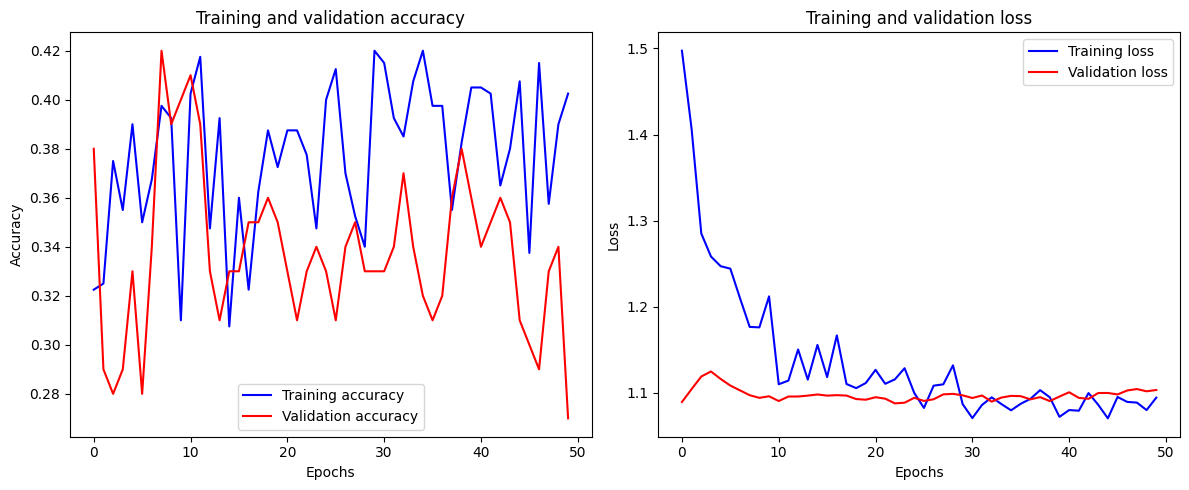

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
loss, accuracy = model.evaluate(X, y_categorical, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Loss: 1.0551, Accuracy: 0.4320


In [8]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\atmatech\AppData\Local\Temp\tmpydfm9p20\assets


INFO:tensorflow:Assets written to: C:\Users\atmatech\AppData\Local\Temp\tmpydfm9p20\assets


Saved artifact at 'C:\Users\atmatech\AppData\Local\Temp\tmpydfm9p20'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1802941777296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941778640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941779024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941778256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941778064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941778832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941779792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941780944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941781328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1802941779408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  180294178